In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)

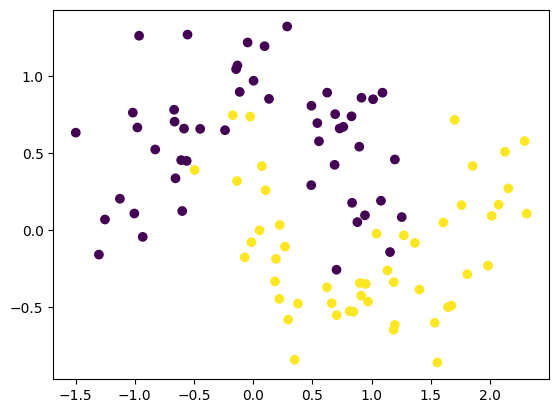

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

c:\Users\Dheeraj\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=500, validation_split = 0.2,verbose=0) #try atleast 2000 epochs for more clearity

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


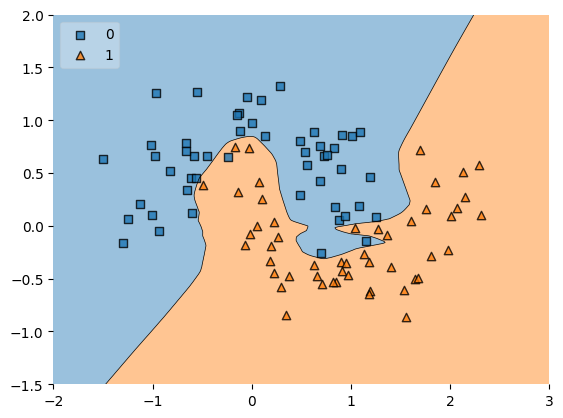

In [7]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

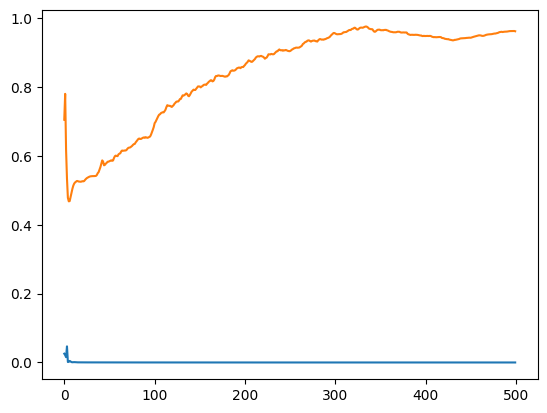

In [8]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [9]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=500, validation_split = 0.2,verbose=0) #try atleast 2000 epochs for more clearity

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step


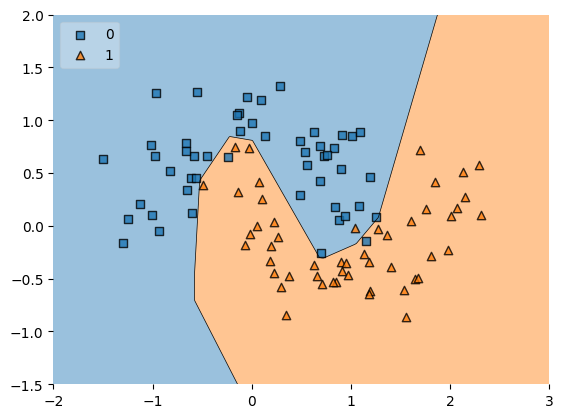

In [12]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

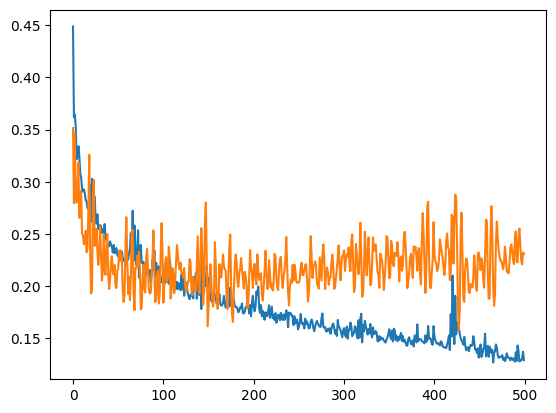

In [13]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [14]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

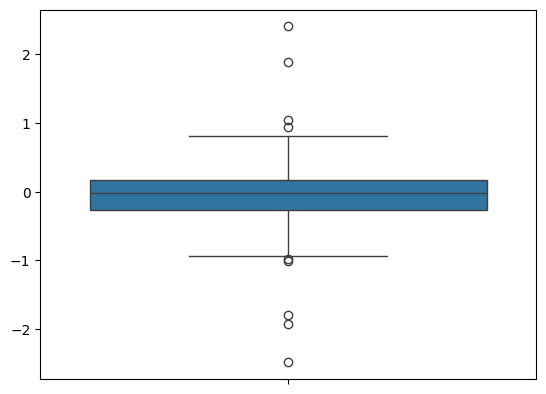

In [15]:
sns.boxplot(model1_weight_layer1)

<Axes: >

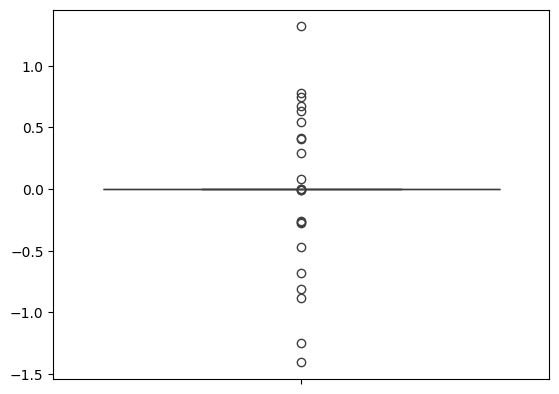

In [16]:
sns.boxplot(model2_weight_layer1)

In [17]:
model1_weight_layer1.min()

-2.4825566

In [18]:
model2_weight_layer1.min()

-1.4068463

C:\Users\Dheeraj\AppData\Local\Temp\ipykernel_17012\2224180084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
C:\Users\Dheeraj\AppData\Local\Temp\ipykernel_17012\2224180084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

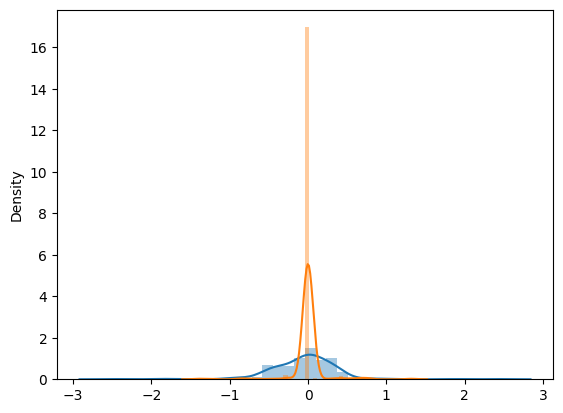

In [19]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [20]:
model1.get_weights()[0].reshape(256)

array([ 3.79821151e-01, -4.67898816e-01, -9.56714749e-02, -5.14200807e-01,
       -1.38063401e-01,  3.14885020e-01, -6.34880140e-02, -2.60729700e-01,
        2.34796613e-01, -1.21963672e-01,  2.97915161e-01,  4.08529192e-02,
       -6.05560280e-02,  1.65702492e-01, -2.37473175e-01,  1.45889327e-01,
       -4.31212969e-02,  1.48259252e-01, -4.23135787e-01,  3.08179528e-01,
        1.28248204e-02, -2.80875921e-01,  3.23019356e-01, -1.28925573e-02,
       -7.00803008e-03, -4.16429162e-01, -1.31736740e-01, -5.06085992e-01,
        3.13280284e-01, -1.15317188e-01, -3.17371517e-01, -3.74153376e-01,
       -2.14446396e-01,  3.41068357e-01, -4.97311801e-01,  8.67570490e-02,
       -1.79696605e-01, -2.86653131e-01, -1.08801352e-03, -1.56743061e-02,
        4.72905755e-01,  3.58062953e-01, -3.50907117e-01, -4.60446388e-01,
       -4.46881622e-01,  3.41979831e-01, -7.88254440e-02, -3.78849864e-01,
        1.14561088e-01,  3.21930554e-03,  3.24788392e-01, -5.28570771e-01,
        1.97503880e-01, -